# Simple LR with TF-IDF

In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
import gensim
from gensim.models import Word2Vec



In [49]:
from tables import index
train_df = pd.read_csv("train_df.csv")
val_df = pd.read_csv("val_df.csv")
test_df = pd.read_csv("test_df.csv")

In [51]:
drop_cols = ["Unnamed: 0", "target"]

X_train = train_df["abstract_text"]
X_val = val_df["abstract_text"]
X_test = test_df["abstract_text"]

In [52]:
# y_train = train_df["target"]
# y_val = val_df["target"]
# y_test = test_df["target"]

In [53]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(train_df["target"].to_numpy())
y_val = label_encoder.transform(val_df["target"].to_numpy())
y_test = label_encoder.transform(test_df["target"].to_numpy())

In [54]:
y_train

array([3, 2, 4, ..., 3, 2, 4])

In [66]:
label_encoder.classes_

array(['BACKGROUND:', 'CONCLUSIONS:', 'METHODS:', 'OBJECTIVE:',
       'RESULTS:'], dtype=object)

In [55]:
X_train.shape, X_val.shape, X_test.shape

((19892,), (6526,), (6637,))

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(19892, 19469)

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(19892, 19469)

In [58]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', LogisticRegression(max_iter=1000))])

In [59]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(max_iter=1000))])

In [60]:
X_test

0       During the past 20 years, the use of video-ass...
1       Twenty consecutive patients who underwent thor...
2       There were 13 men and 7 women (mean age, 57 ye...
3       Our experience suggests that thoracoscopic wed...
4       To explore an ideal technique for remodeling t...
                              ...                        
6632    The RGCT intervention led to increased breast ...
6633    To evaluate the access to axilla, postoperativ...
6634    One hundred seventeen consecutive women with o...
6635       No intraoperative complications were observed.
6636    The Y-shaped approach for modified radical mas...
Name: abstract_text, Length: 6637, dtype: object

In [61]:
predicted = clf.predict(X_val.values.astype('U'))

In [62]:
np.mean(predicted == y_val)

0.7542139135764634

In [63]:
print(classification_report(predicted, y_val))

              precision    recall  f1-score   support

           0       0.36      0.50      0.42       384
           1       0.69      0.67      0.68      1262
           2       0.87      0.85      0.86      1754
           3       0.73      0.71      0.72      1330
           4       0.83      0.81      0.82      1796

    accuracy                           0.75      6526
   macro avg       0.69      0.71      0.70      6526
weighted avg       0.76      0.75      0.76      6526



In [64]:
predicted = clf.predict(X_test.values.astype('U'))
np.mean(predicted == y_test)

0.7530510772939581

In [65]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.36      0.52      0.42       397
           1       0.68      0.68      0.68      1287
           2       0.88      0.84      0.86      1801
           3       0.74      0.71      0.73      1340
           4       0.82      0.80      0.81      1812

    accuracy                           0.75      6637
   macro avg       0.70      0.71      0.70      6637
weighted avg       0.77      0.75      0.76      6637



In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes='auto', figsize=(10, 10), text_size=11): 
    # Generate confusion matrix 
    cm = confusion_matrix(y_true, y_pred)
    
    # Set plot size
    plt.figure(figsize=figsize)

    # Create confusion matrix heatmap
    disp = sns.heatmap(
        cm, annot=True,
        fmt='d',
        linewidths=1, linecolor='black', clip_on=False,
        xticklabels=classes, yticklabels=classes)
    
    # Set title and axis labels
    disp.set_title('Confusion Matrix')
    disp.set_xlabel('Predicted Label') 
    disp.set_ylabel('True Label')
    
    # Plot confusion matrix
    plt.show()
    
    return

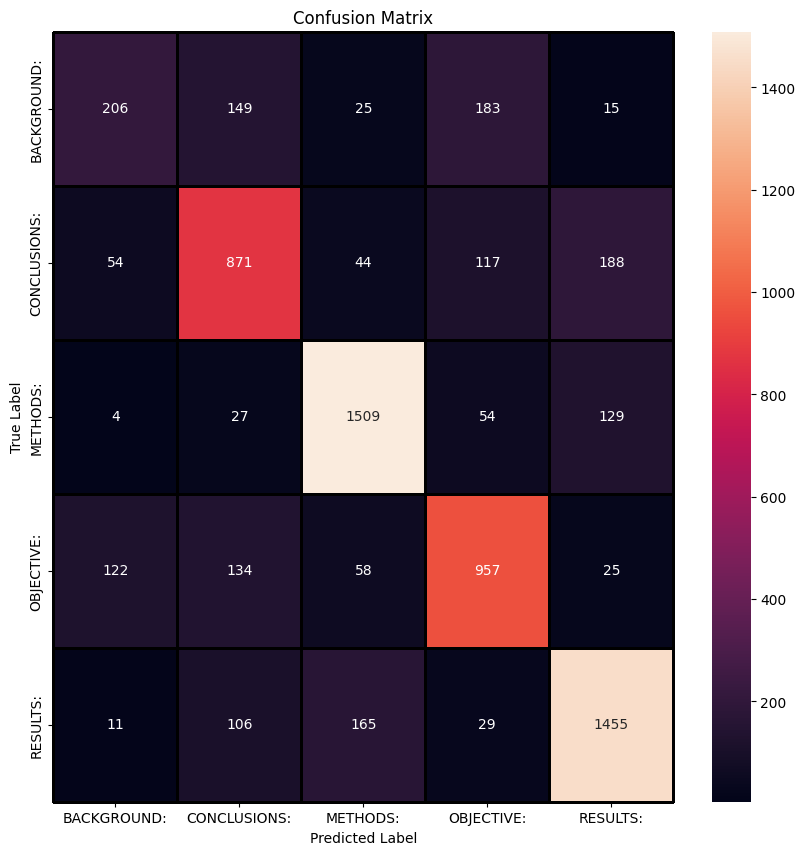

In [69]:
# View Confusion Matrix
plot_confusion_matrix(
    y_test, 
    predicted, 
    figsize=(10, 10), 
    classes=list(label_encoder.classes_))